In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# sample dataset
x = np.array([[650], [800], [1200], [1500], [1800], [2200], [2500], [3000], [3500]])
y = np.array([150, 200, 320, 380, 420, 500, 560, 650, 750])

#splitting dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

# create a linear regression model
model = LinearRegression()

# train the modelusing training data
model.fit(x_train,y_train)

# make predictions on the test set
y_pred = model.predict(x_test)

# print the coefficients
print(f"Coefficient(slope):{model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# evaluating the model

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(r2)

Coefficient(slope):0.20230716723549486
Intercept: 54.17133105802054
189.79865251779376
0.9962508908144634


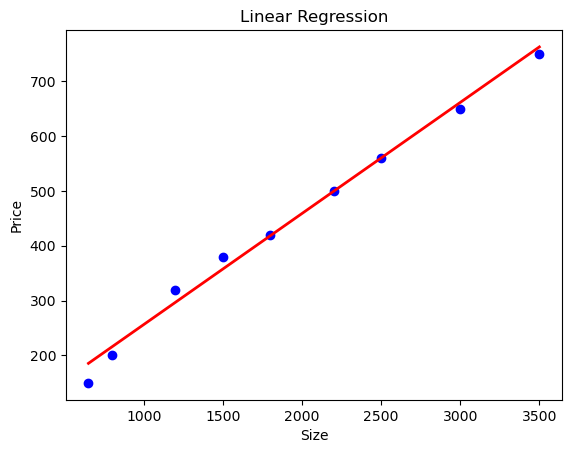

In [4]:
# plotiing the regression line
plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x),color='red',linewidth=2)
plt.title('Linear Regression')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error , r2_score

In [6]:
df = sns.load_dataset('tips')

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.shape

(244, 7)

In [11]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: ylabel='Frequency'>

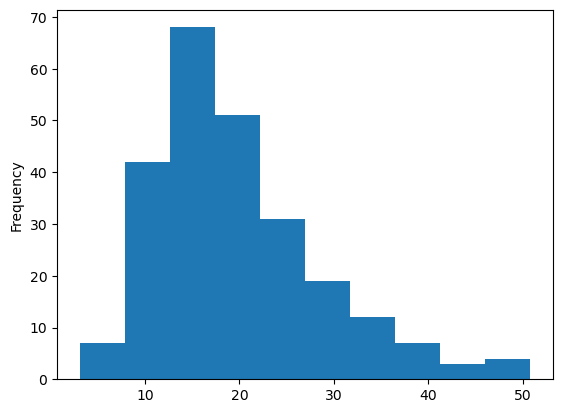

In [12]:
# univariate analysis
df['total_bill'].plot(kind='hist')

<Axes: ylabel='Frequency'>

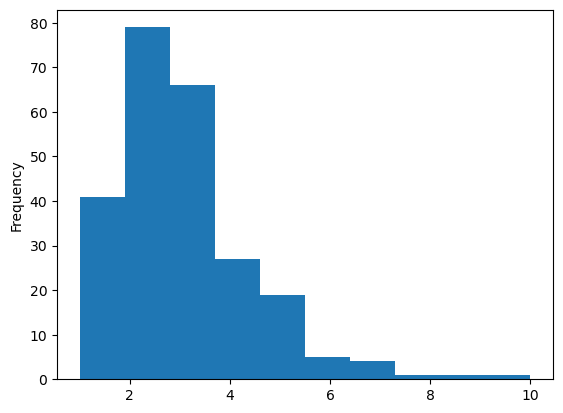

In [13]:
df['tip'].plot(kind='hist')

<Axes: xlabel='sex'>

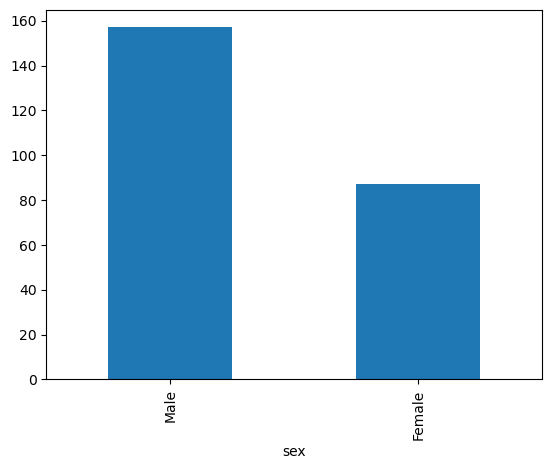

In [15]:
df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

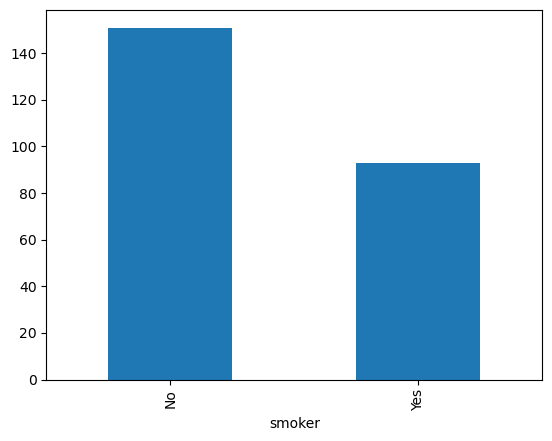

In [16]:
# smoker
df['smoker'].value_counts().plot(kind='bar')

<Axes: xlabel='time'>

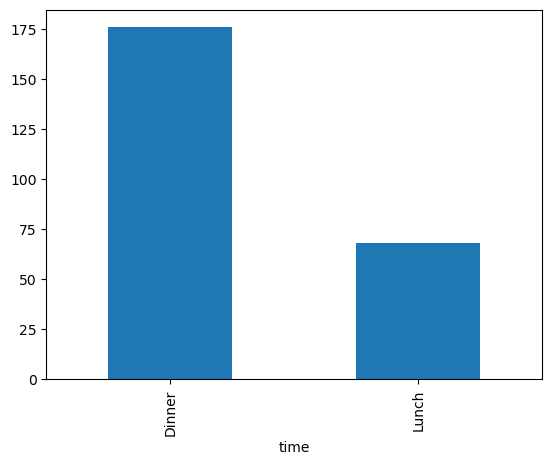

In [17]:
df['time'].value_counts().plot(kind='bar')

<Axes: xlabel='day'>

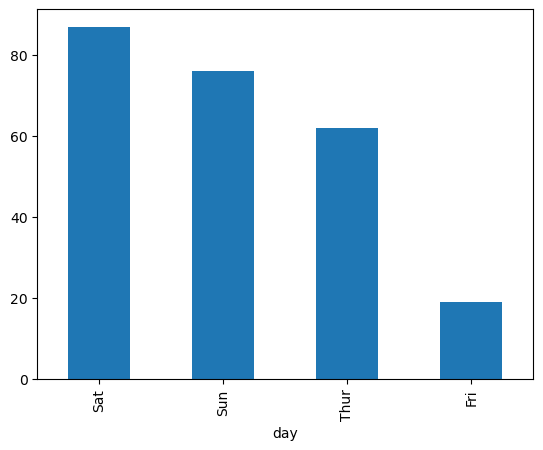

In [18]:
df['day'].value_counts().plot(kind='bar')

In [32]:
# label encoding the categorical columns
sex_le = LabelEncoder()
smoker_le = LabelEncoder()
day_le = LabelEncoder()
time_le = LabelEncoder()

In [33]:
df['sex'] = sex_le.fit_transform(df['sex'])
df['smoker'] = smoker_le.fit_transform(df['smoker'])
df['day'] = day_le.fit_transform(df['day'])
df['time'] = time_le.fit_transform(df['time'])

In [34]:
x = df[['total_bill','tip','sex','smoker','day','time']]
y = df['tip']

In [35]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [36]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 12)

In [37]:
model = LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [39]:
mae  = mean_absolute_error(y_test,y_pred)

mse = mean_squared_error(y_test,y_pred)

mse = mean_squared_error(y_test,y_pred)

r2 = r2_score(y_test,y_pred)

print(mae)
print(mse)
print(r2)

2.39717542868044e-15
1.0324619577133676e-29
1.0


# Label encoder

In [40]:
from sklearn.preprocessing import LabelEncoder

colors = ['red','blue','yellow','green','red','blue']

le = LabelEncoder()

encoded_colors = le.fit_transform(colors)
print(encoded_colors)

[2 0 3 1 2 0]


In [42]:
# to see the mapping between original categories and encoder
print(le.classes_)

['blue' 'green' 'red' 'yellow']


In [44]:
new_colors = ['green','blue','red']
new_encoded_colors = le.transform(new_colors)
print(new_encoded_colors)

[1 0 2]
